In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from sklearn import datasets
from tensorflow.keras.callbacks import CSVLogger
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
model = Sequential()

In [3]:
model.add(Conv2D(32,5,strides = 1,padding = 'same',activation = 'relu',input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2), padding = 'same'))
model.add(Conv2D(64,5,strides = 1,padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 1024 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'sigmoid'))

In [4]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3212288   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [6]:
(X_train,l_train),(X_test,l_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

In [7]:
l_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
#converting label using one hot coding
Y_train = np.zeros((l_train.shape[0], l_train.max()+1), dtype=np.int32)
Y_train[np.arange(l_train.shape[0]), l_train] = 1
Y_test = np.zeros((l_test.shape[0], l_test.max()+1), dtype=np.int32)
Y_test[np.arange(l_test.shape[0]), l_test] = 1

In [9]:
img_rows=X_train[0].shape[0]
img_cols=X_test[0].shape[1]
X_train=X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test=X_test.reshape(X_test.shape[0],img_rows,img_cols,1)

In [10]:
model.fit(X_train,Y_train,epochs = 20,batch_size = 1000,validation_data = (X_test,Y_test),callbacks = [CSVLogger("MNIST_without_dropout.csv",append = True)])

Epoch 1/20
60/60 [==============================] - 28s 463ms/step - loss: 1.2932 - accuracy: 0.6515 - val_loss: 0.0441 - val_accuracy: 0.9355
Epoch 2/20
60/60 [==============================] - 29s 477ms/step - loss: 0.0304 - accuracy: 0.9574 - val_loss: 0.0201 - val_accuracy: 0.9724
Epoch 3/20
60/60 [==============================] - 28s 468ms/step - loss: 0.0173 - accuracy: 0.9762 - val_loss: 0.0142 - val_accuracy: 0.9807
Epoch 4/20
60/60 [==============================] - 29s 480ms/step - loss: 0.0118 - accuracy: 0.9851 - val_loss: 0.0118 - val_accuracy: 0.9850
Epoch 5/20
60/60 [==============================] - 28s 474ms/step - loss: 0.0085 - accuracy: 0.9894 - val_loss: 0.0101 - val_accuracy: 0.9860
Epoch 6/20
60/60 [==============================] - 28s 470ms/step - loss: 0.0064 - accuracy: 0.9924 - val_loss: 0.0102 - val_accuracy: 0.9851
Epoch 7/20
60/60 [==============================] - 28s 471ms/step - loss: 0.0052 - accuracy: 0.9941 - val_loss: 0.0091 - val_accuracy: 0.9876

In [11]:
pred = np.argmax(model.predict(X_test),1)

In [14]:
data = pd.read_csv('MNIST_without_dropout.csv')

Text(0.5, 1.0, 'Epoch vs  accuracy')

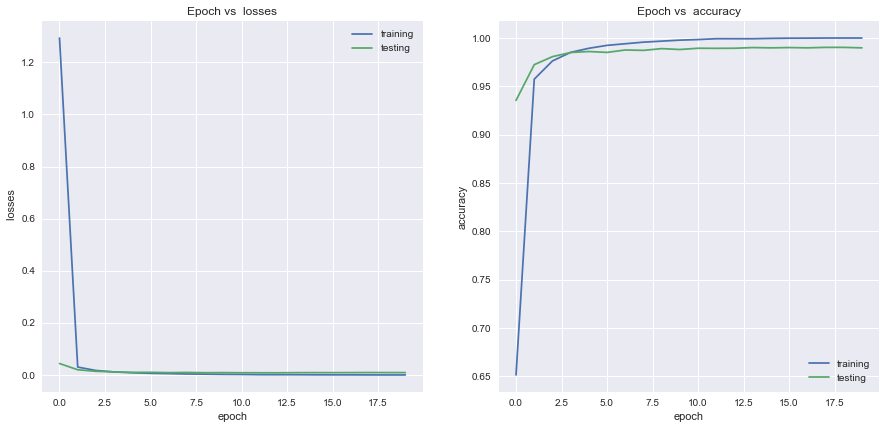

In [37]:
plt.style.use('seaborn')
plt.figure(figsize = (15.0,15.0))


plt.subplot(2,2,1)
plt.plot(data['epoch'],data['loss'])
plt.plot(data['epoch'],data['val_loss'])
plt.legend(["training", "testing"], loc ="upper right")
plt.xlabel("epoch")
plt.ylabel(" losses")
plt.title("Epoch vs  losses")

plt.subplot(2,2,2)
plt.plot(data['epoch'],data['accuracy'])
plt.plot(data['epoch'],data['val_accuracy'])
plt.legend(["training", "testing"], loc ="lower right")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Epoch vs  accuracy")

